### 4. Aufgabe - Communities

In [1]:
from src.Graph import Graph
import src.communities.two_plexe as Tp
import src.communities.two_plexe_test_correctness as Tpc
from src.printGraph import draw_graph
import src.shortestPaths as Sp

import test_.HelperClass as Hc

import matplotlib.pyplot as plt

import time 
import random
import numpy as np

### 2 Plex Aufgabe

Wir haben erst einmal den basic 2 Plex Algorithmus gemäß des Aufgabenblattes implementiert. Anschließend wurden der Reihe nach alle 4 vorgeschlagenen Verbesserungen als extra Funktionen implementiert.

Der basic Algorithmus arbeitet mit Mengen, da die meisten Graph Operationen Mengen zurückgeben (.getNeighbors bspw). Dadurch kann mit Set-Operationen wie &, -, | gearbeitet werden. Dadurch ist der Algorithmus allerdings nicht deterministisch und die Ausgabemenge bzw. Reihenfolge kann sich nach jedem Durchlauf verändern. 
Um zu testen ob die Ausgabe trotzdem korrekt ist, wurde eine deterministische Variante, basierend auf sortierten Listen implementiert.

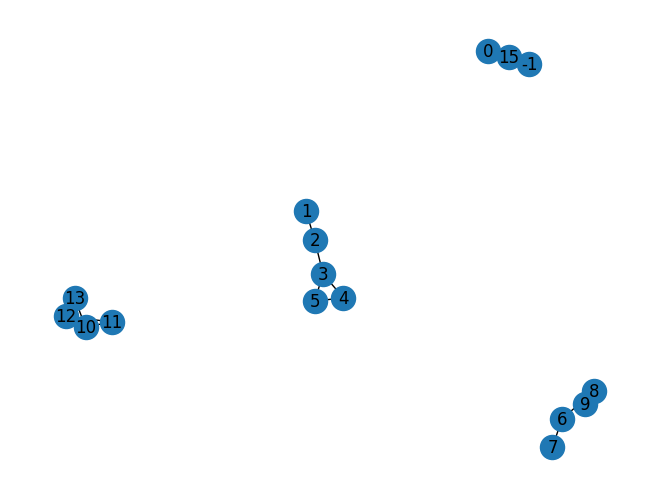

In [2]:
# Wir werden zunächst auf folgendem Graphen arbeiten
G, _, _ = Hc.create_graph()
draw_graph(G, label_on=True)

# Der größte 2-plex ist {10, 11, 12, 13}

In [3]:
# 1. Wie werden die Algorithmen ausgeführt und was ist die Ausgabe?
print(Tp.search_2_plex(G, version=0))
print(Tp.search_2_plex(G, version=1))
print(Tp.search_2_plex(G, version=2))
print(Tp.search_2_plex(G, version=3))
print(Tp.search_2_plex(G, version=4))

print("")

print(Tpc.search_2_plex_det(G, version=0))
print(Tpc.search_2_plex_det(G, version=1))
print(Tpc.search_2_plex_det(G, version=2))
print(Tpc.search_2_plex_det(G, version=3))
print(Tpc.search_2_plex_det(G, version=4))

print("")

print(Tp.search_2_plex(G, version=5))

{'10', '13', '12', '11'}
{'10', '13', '12', '11'}
{'10', '13', '12', '11'}
{'10', '13', '12', '11'}
{'10', '13', '12', '11'}

['10', '13', '11', '12']
['10', '13', '11', '12']
['11', '13', '10', '12']
['11', '13', '10', '12']
['11', '13', '10', '12']

{'3', '5', '4'}


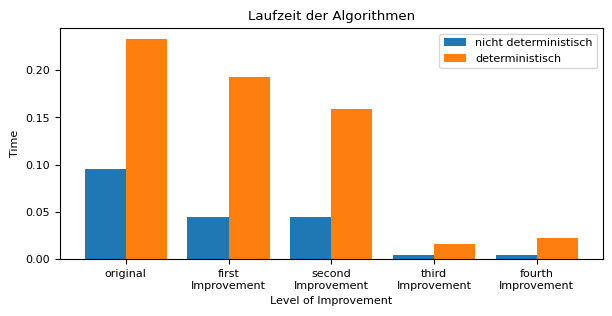

In [4]:
# Laufzeit -> Vergleich aller 5 Varianten auf Karate Netzwerk 
# Vergleich determinisitisch vs nicht-deterministisch
plt.rcParams.update({'font.size': 8})

G = Graph("networks/out.ucidata-zachary_")

names = ["original", "first\nImprovement", "second\nImprovement", 
         "third\nImprovement", "fourth\nImprovement"]
times = []
times_det = []

for i in range(len(names)):
    start_time = time.time()
    Tp.search_2_plex(G, i)
    times.append(time.time() - start_time)

    start_time = time.time()
    Tpc.search_2_plex_det(G, i)
    times_det.append(time.time() - start_time)
  
fig = plt.figure(figsize=(7, 3))

X_axis = np.arange(len(names))
  
plt.bar(X_axis - 0.2, times, 0.4, label = 'nicht deterministisch')
plt.bar(X_axis + 0.2, times_det, 0.4, label = 'deterministisch')
  
plt.xticks(X_axis, names)
plt.xlabel("Level of Improvement")
plt.ylabel("Time")
plt.title("Laufzeit der Algorithmen")
plt.legend()
plt.show()

In [ ]:
# Laufzeit auf econ Networks
G = Graph("networks/econ_networks/econ-beacxc.mtx")

print(Tp.search_2_plex(G, 4))